# Boosting

## Setup

In [1]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("Ensemble-Learning-Notebooks"):
    raise ValueError("Please change working directory to 'path/Ensemble-Learning-Notebooks' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/Ensemble-Learning-Notebooks


In [2]:
!pip install -r requirements.txt

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Generation

In [5]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Adaboost

### Training Adaboost Classifier

In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), 
    n_estimators=30,
    learning_rate=0.5, random_state=42
)
tree_clf = DecisionTreeClassifier(max_depth=5)

ada_clf.fit(X_train, y_train)
tree_clf.fit(X_train, y_train)

/Users/irellzane/MLprojects/Ensemble-Learning-Notebooks/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


DecisionTreeClassifier(max_depth=5)

In [19]:
tree_clf.score(X_test, y_test)

0.896

In [20]:
ada_clf.score(X_test, y_test)

0.904

### Under the hood of the Adaboost classifier

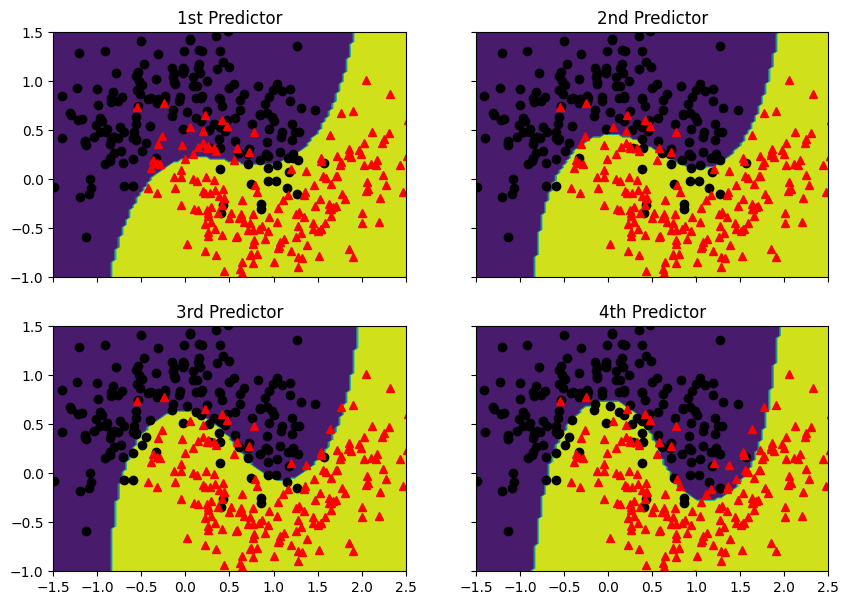

In [ ]:
from sklearn.svm import SVC

fig, axs = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(10, 7))

x1s = np.linspace(-1.5, 2.5, 100)
x2s = np.linspace(-1, 1.5, 100)

x1_mesh, x2_mesh = np.meshgrid(x1s, x2s)
X_coords = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]

svm_clf = SVC(C=0.2, gamma=0.6, random_state=42)

m = len(X_train)
learning_rate = 0.5
sample_weights = np.full(m, 1/m)
for i in range(4):
    plt.sca(axs.ravel()[i])

    plt.plot(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], "ko")
    plt.plot(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], "r^")
    svm_clf.fit(X_train, y_train, sample_weight=sample_weights*m)
    y_pred = svm_clf.predict(X_train) 
    sample_error =sample_weights[y_train != y_pred].sum()
    r = sample_error/sample_weights.sum()
    alpha = learning_rate * np.log((1 - r) / r)
    sample_weights[y_train != y_pred] *= np.exp(alpha)
    sample_weights /= sample_weights.sum()

    y_pred_mesh = svm_clf.predict(X_coords).reshape(x1_mesh.shape)
    plt.contourf(x1_mesh, x2_mesh, y_pred_mesh)
    plt.axis([-1.5, 2.5, -1, 1.5])

axs[0][0].set_title("1st Predictor")
axs[0][1].set_title("2nd Predictor")
axs[1][0].set_title("3rd Predictor")
axs[1][1].set_title("4th Predictor")

plt.show()

## Gradient Boosting

#### Polinomial Data Generation

In [66]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.randn(100)

### Training a Gradient Boosting Regressor

In [83]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3,
                                  learning_rate=1.0, random_state=42)

gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [84]:
gbrt_tweaked = GradientBoostingRegressor(max_depth=2, n_estimators=100,
                                         learning_rate=0.05, random_state=42)

gbrt_tweaked.fit(X, y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, random_state=42)

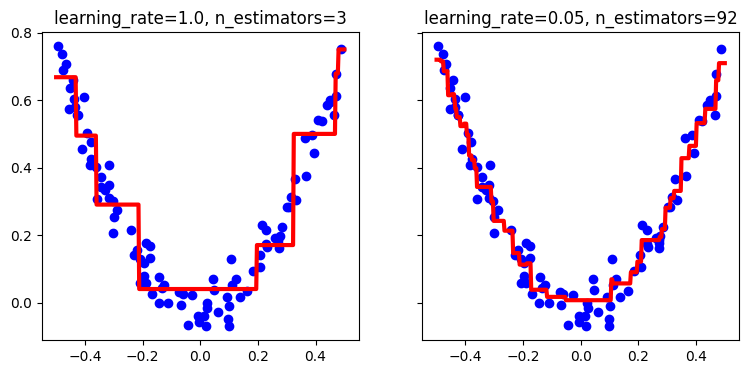

In [86]:
xs = np.linspace(-0.5, 0.5, 400).reshape(-1, 1)
y_pred = gbrt.predict(xs)
y_tweaked_pred = gbrt_tweaked.predict(xs)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(9, 4))
ax1.plot(X, y, "bo")
ax2.plot(X, y, "bo")

ax1.plot(xs, y_pred, "r", linewidth=3)
ax1.set_title("learning_rate=1.0, n_estimators=3")

ax2.plot(xs, y_tweaked_pred, "r", linewidth=3)
ax2.set_title("learning_rate=0.05, n_estimators=92")


plt.show()